In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. Exploración Inicial del Dataset
• Cargar el conjunto de datos con Pandas.
• Revisar la estructura del dataset (shape, info(), describe()).
• Identificar variables relevantes para el análisis.

In [7]:
df_datos = pd.read_csv('datos.csv')
'''Primero revisamos la estructura del dataset'''
print('Forma del dataset:', df_datos.shape)
print('\n Informacion del dataset:')
print(df_datos.info())
print('\n Descripcion del dataset:')
print(df_datos.describe())

Forma del dataset: (50, 16)

 Informacion del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID_Empleado                    50 non-null     object 
 1   Edad                           50 non-null     int64  
 2   Años_Experiencia               50 non-null     int64  
 3   Departamento                   50 non-null     object 
 4   Nivel_Puesto                   50 non-null     object 
 5   Salario_USD                    50 non-null     int64  
 6   Horas_Extra_Mes                50 non-null     int64  
 7   Rendimiento_Anual              50 non-null     float64
 8   Satisfaccion_Laboral           50 non-null     int64  
 9   Proyectos_Completados          50 non-null     int64  
 10  Formacion_Continua             50 non-null     object 
 11  Tiempo_Promedio_Proyecto_Dias  50 non-null     int64  
 1

2. Estadística Descriptiva
• Calcular medidas estadísticas: media, mediana, moda, desviación
estándar, mínimo, máximo y percentiles para variables
cuantitativas.
• Identificar posibles outliers utilizando boxplots o métodos
estadísticos.


Variables cuantitativas: 
Index(['Edad', 'Años_Experiencia', 'Salario_USD', 'Horas_Extra_Mes',
       'Rendimiento_Anual', 'Satisfaccion_Laboral', 'Proyectos_Completados',
       'Tiempo_Promedio_Proyecto_Dias', 'Horas_Capacitacion_Anual',
       'Distancia_Oficina_KM', 'Antiguedad_Meses'],
      dtype='object')
            Edad  Años_Experiencia    Salario_USD  Horas_Extra_Mes  \
count  50.000000         50.000000      50.000000        50.000000   
mean   33.660000          7.740000   87240.000000         4.900000   
std     6.303902          5.446624   30927.538749         3.892693   
min    25.000000          1.000000   53000.000000         0.000000   
25%    28.250000          3.000000   60000.000000         2.000000   
50%    32.000000          6.000000   75500.000000         4.000000   
75%    38.000000         10.750000  107250.000000         7.750000   
max    47.000000         21.000000  165000.000000        13.000000   

       Rendimiento_Anual  Satisfaccion_Laboral  Proyect

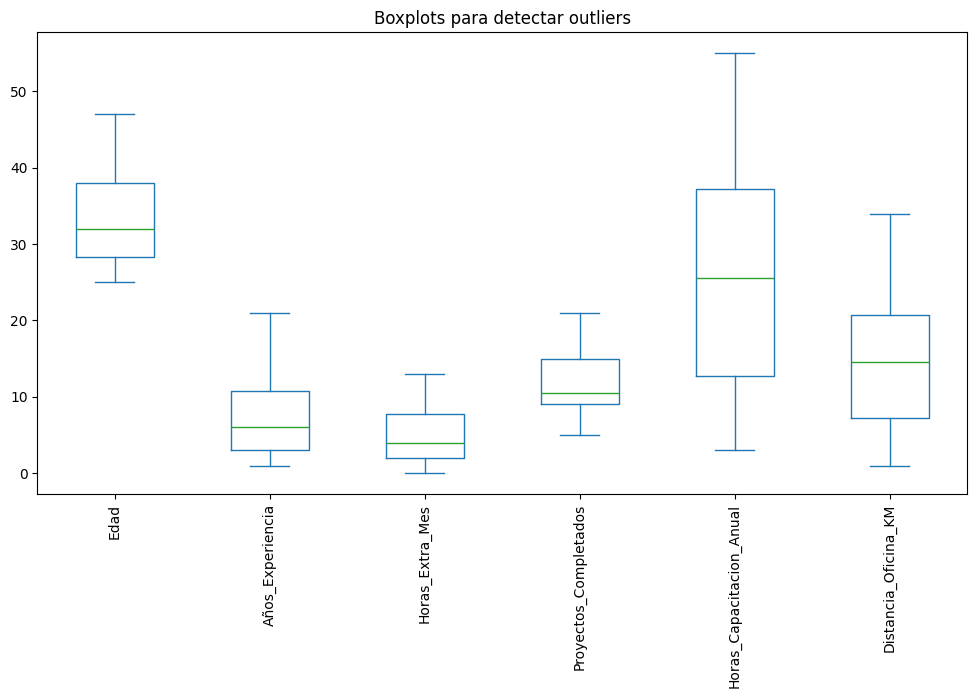

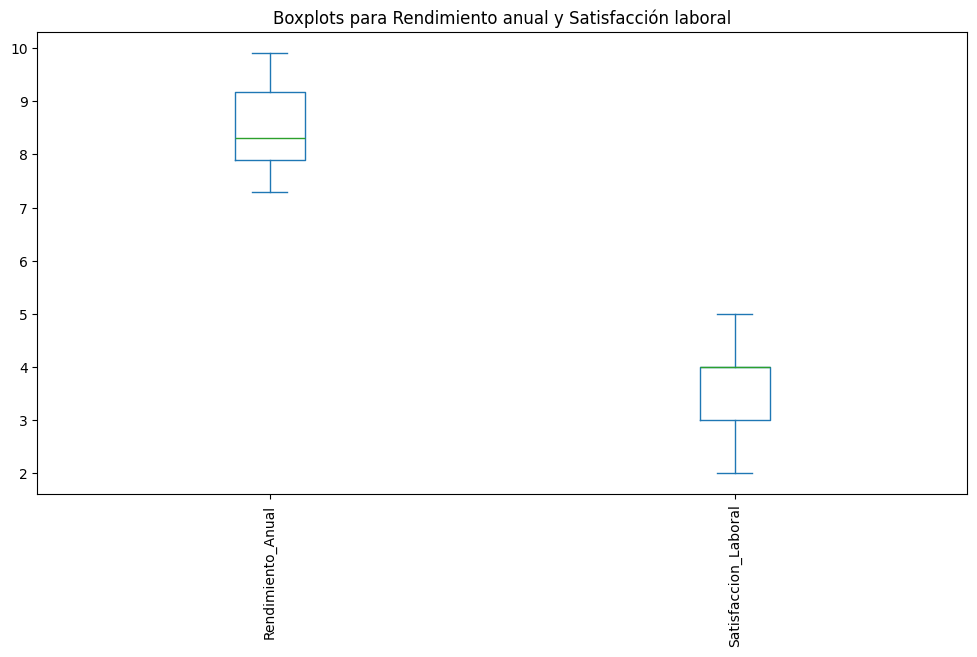

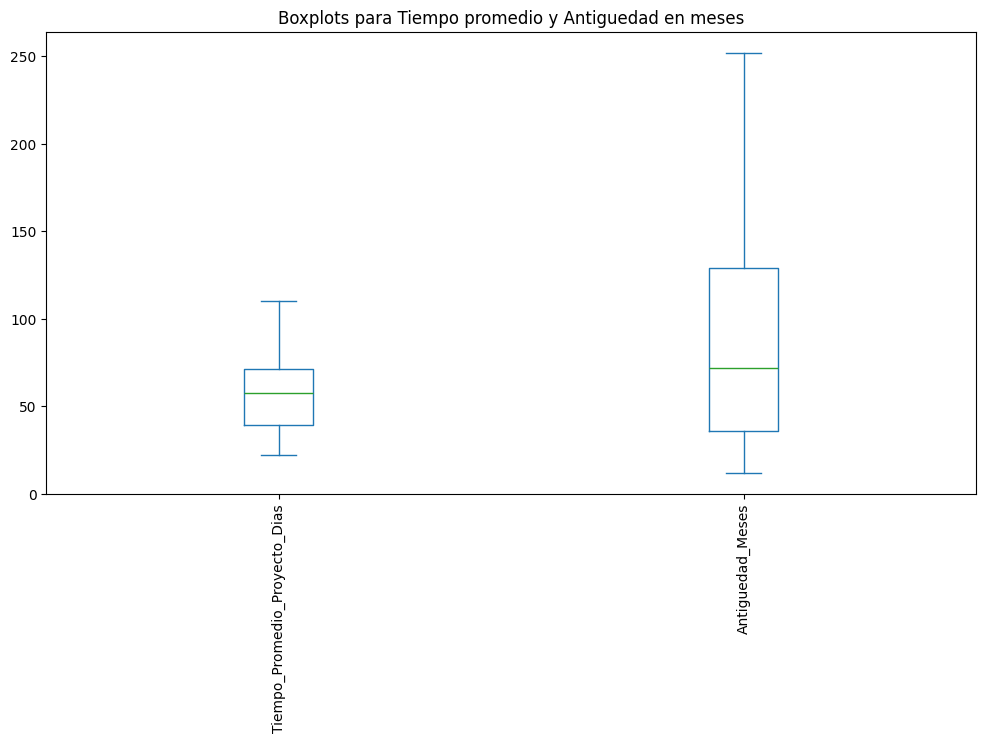

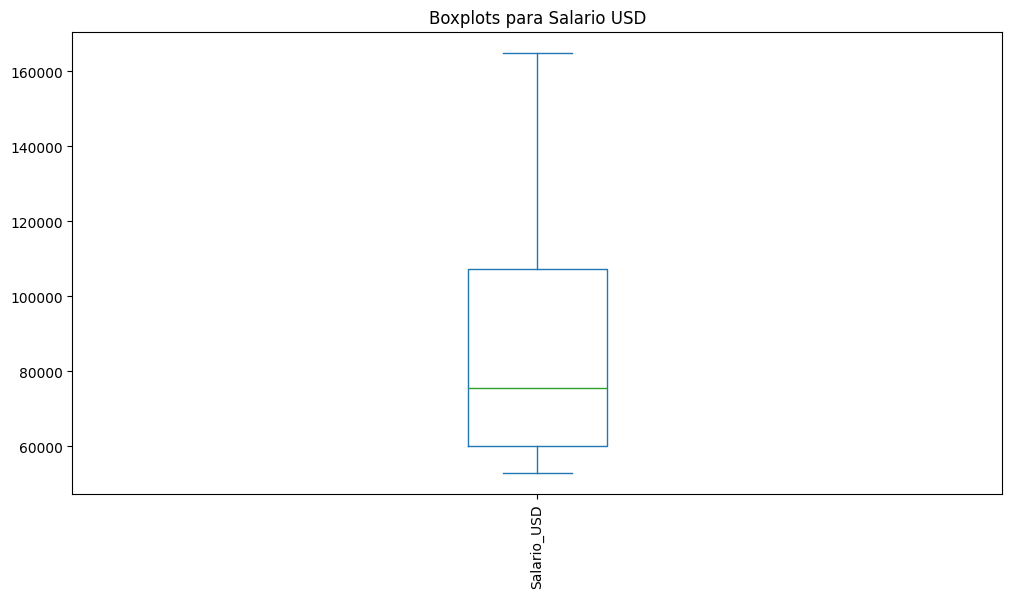

In [8]:
'''Se identifican toda las variables cuantitativas del archivo y luego se procede a calcular las 
medidas estadísticas'''

#identificar variables cuantitativas
df_cuantitativa = df_datos.select_dtypes(include=['int64', 'float64']).columns
print('Variables cuantitativas: ')
print(df_cuantitativa)

'''definí una nueva función para los valores cuantitativos y le quité el .column acá ya que me genera 
error de Index)'''

df_varcuant = df_datos.select_dtypes(include=['int64', 'float64'])
estadistica = df_varcuant.describe()
print(estadistica)
df_sinsalario = df_varcuant.drop(columns=['Salario_USD', 'Antiguedad_Meses', 'Rendimiento_Anual', 
                                          'Satisfaccion_Laboral', 'Tiempo_Promedio_Proyecto_Dias'])
'''Ahora calculamos los posibles outliners usando boxplots'''
df_sinsalario2 = df_varcuant.drop(columns=['Edad', 'Años_Experiencia', 'Horas_Extra_Mes', 'Proyectos_Completados',
                                        'Horas_Capacitacion_Anual', 'Distancia_Oficina_KM', 'Salario_USD'])

df_sinsalario.plot(kind='box', figsize=(12,6))
plt.title('Boxplots para detectar outliers')
plt.xticks(rotation=90)
plt.show()

df_varcuant[['Rendimiento_Anual', 'Satisfaccion_Laboral']].plot(kind='box', figsize=(12,6))
plt.title('Boxplots para Rendimiento anual y Satisfacción laboral')
plt.xticks(rotation=90)
plt.show()

df_varcuant[['Tiempo_Promedio_Proyecto_Dias', 'Antiguedad_Meses']].plot(kind='box', figsize=(12,6))
plt.title('Boxplots para Tiempo promedio y Antiguedad en meses')
plt.xticks(rotation=90)
plt.show()

df_varcuant['Salario_USD'].plot(kind='box', figsize=(12,6))
plt.title('Boxplots para Salario USD')
plt.xticks(rotation=90)
plt.show()

#Se separaron los boxplot para dar mayor énfasis en resultados con rangos similares

3. Análisis de Correlación
• Calcular la matriz de correlación entre variables numéricas.
• Interpretar los resultados y destacar correlaciones fuertes o
inesperadas.
• Visualizar la correlación utilizando un heatmap con Seaborn.

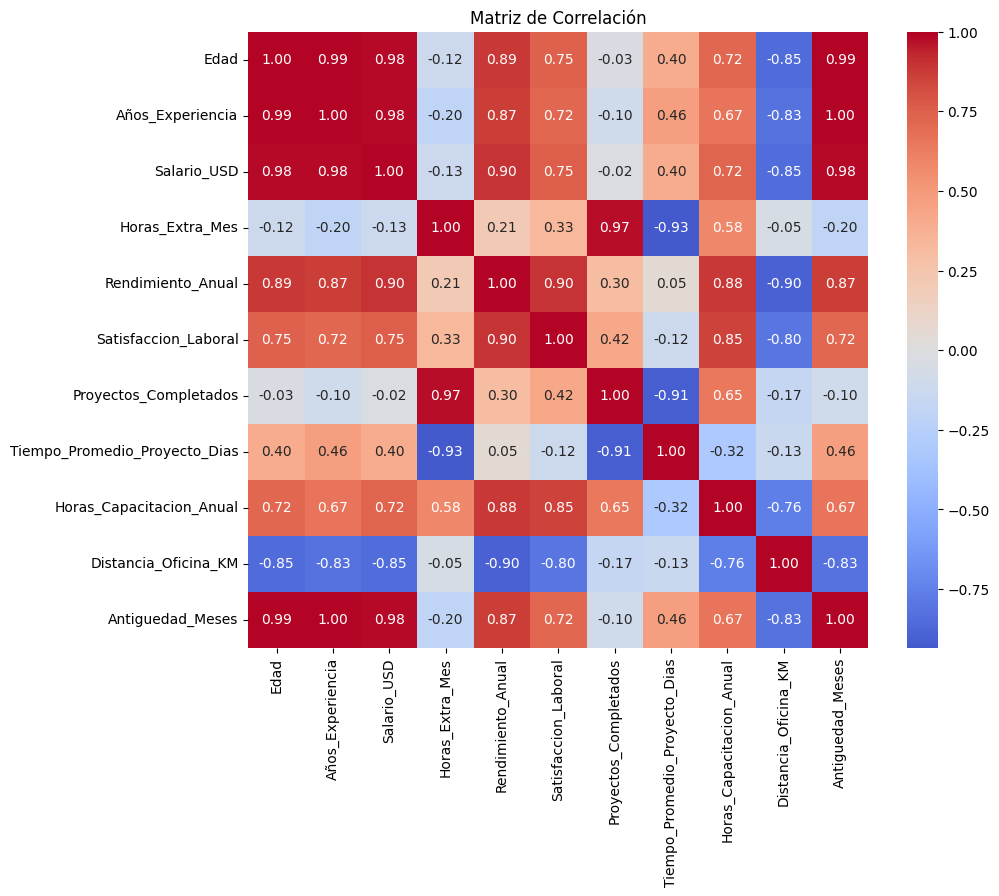

In [9]:
'''Calcular la matríz de correlación con los valores obtenidos anteriormente'''
matriz_correlacion = df_varcuant.corr()
matriz_correlacion

'''Ahora usamos seaborn para hacer el mapa de calor con los valores mostrados'''

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


Los puntos a destacar son los siguientes:

Correlaciones fuertes y positivas:
1. Edad, antiguedad en meses y años de experiencia dan a entender una correlación casi perfecta entre ellas (aunque antiguedad en meses y años de experiencia parecieran ser redundantes entre si).
2. Salario en USD está fuertemente correlacionado con edad y años de experiencia. (mayor año de experiencia mayor es el salario)
3. Rendimiento anual tiene correlacion fuerte con salario y satisfacción laboral

Correlaciones fuertes y negativas:
1. Distancia a la oficina, el rendimiento anual y el salario tienen una correlación negativa.

Relaciones curiositas
1. El tiempo promedio de los proyectos disminuye cuando aumentas las horas extras
2. Las horas extras se correlacionan positivamente con los proyectos completados pero una correlacion negativa con el tiempo promedio por proyecto (a mayor horas extras, menor tiempo por proyecto).


4. Visualización de Datos
• Crear al menos 4 visualizaciones relevantes que permitan:
o Analizar la distribución de una variable numérica.
o Comparar variables categóricas con cuantitativas.
o Identificar relaciones entre dos variables numéricas.
o Observar diferencias entre subgrupos de la población.
• Aplicar personalizaciones con matplotlib (títulos, etiquetas,
colores, leyendas).

Como se nos pide analizar la distribución de una variable numérica, la mejor variable
para este caso es "Salario_USD" ya que es una métrica que tiene una gran importancia en los datos
que se están analizando. Luego vamos a comparar "salario" con variables categóricas de la lista. Para este caso se usará: Departamento, Nivel de puesto con Salario. Esta desición me baso tanto en lo que parece ser más importante para una empresa (comportamiento de los salarios en base a diferentes variables) a como se correlaciona con otras variables (basándome en la matríz de relación con el mapa de calor)

In [10]:
print(df_datos.columns.tolist())

['ID_Empleado', 'Edad', 'Años_Experiencia', 'Departamento', 'Nivel_Puesto', 'Salario_USD', 'Horas_Extra_Mes', 'Rendimiento_Anual', 'Satisfaccion_Laboral', 'Proyectos_Completados', 'Formacion_Continua', 'Tiempo_Promedio_Proyecto_Dias', 'Horas_Capacitacion_Anual', 'Distancia_Oficina_KM', 'Antiguedad_Meses', 'Rotacion']


Vamos a ver la distribución de salarios en la empresa que se está analizando

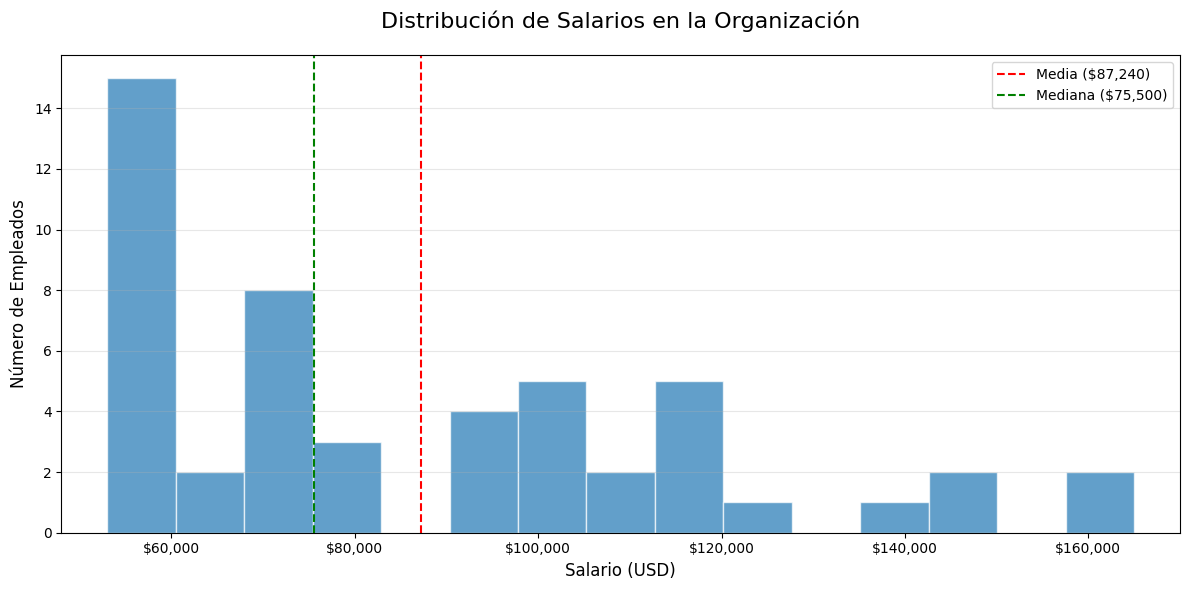

In [11]:
plt.figure(figsize=(12, 6))

# Se usará histograma para graficar
n, bins, patches = plt.hist(df_varcuant['Salario_USD'], bins=15, color='#1f77b4', 
                            edgecolor='white', alpha=0.7)
plt.title('Distribución de Salarios en la Organización', fontsize=16, pad=20)
plt.xlabel('Salario (USD)', fontsize=12)
plt.ylabel('Número de Empleados', fontsize=12)

# Se formatear el eje X como moneda para una mejor comprensión
plt.gca().xaxis.set_major_formatter('${x:,.0f}')

#Líneas de referencia que son importantes al momento de analizar

mean_sal = df_varcuant['Salario_USD'].mean()
median_sal = df_varcuant['Salario_USD'].median()
plt.axvline(mean_sal, color='red', linestyle='--', linewidth=1.5, 
            label=f'Media (${mean_sal:,.0f})')
plt.axvline(median_sal, color='green', linestyle='--', linewidth=1.5, 
            label=f'Mediana (${median_sal:,.0f})')
plt.grid(axis='y', alpha=0.3)
plt.legend()

#Se ajustan límites
plt.xlim(left=df_varcuant['Salario_USD'].min()-5000, 
         right=df_varcuant['Salario_USD'].max()+5000)

plt.tight_layout()
plt.show()

Ahora vamos a analizar la relación de Salario con una variable catégorica (se determinó Departamento como una de las variables)

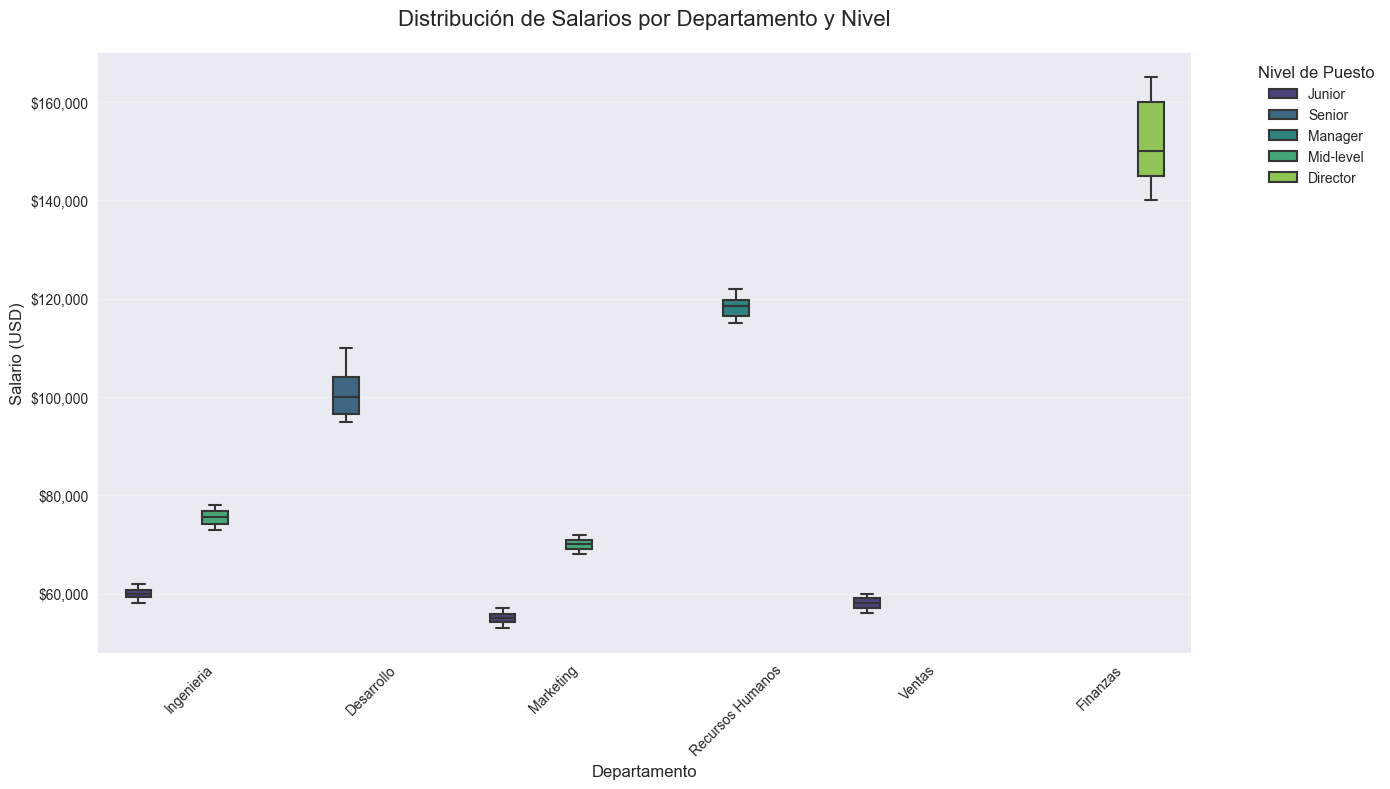

In [12]:

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(14, 8))

boxplot = sns.boxplot(data=df_datos,x='Departamento',y='Salario_USD',hue='Nivel_Puesto',palette='viridis',
    width=0.7,linewidth=1.5,fliersize=4)

plt.title('Distribución de Salarios por Departamento y Nivel', fontsize=16, pad=20)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Salario (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Formatear eje Y como moneda
plt.gca().yaxis.set_major_formatter('${x:,.0f}')

# Ajustar límites del eje Y
plt.ylim(df_datos['Salario_USD'].min() - 5000, df_datos['Salario_USD'].max() + 5000)

plt.legend(title='Nivel de Puesto',title_fontsize=12,fontsize=10,bbox_to_anchor=(1.05, 1),
           loc='upper left')

# Cuadrícula
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


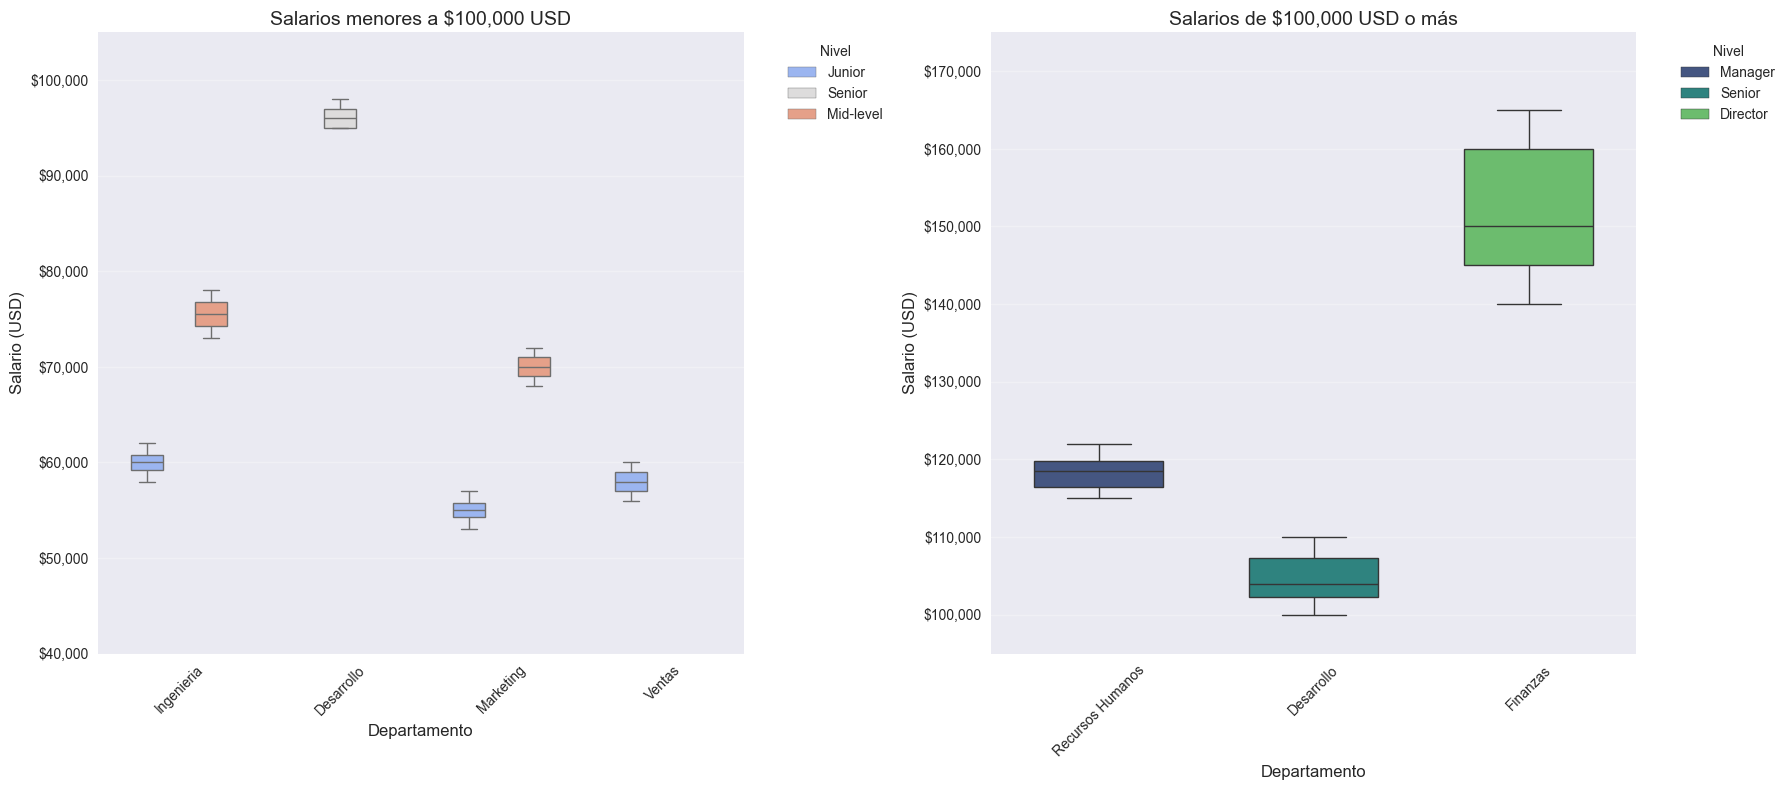

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración
plt.style.use('seaborn-v0_8')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Crear máscaras para filtrar los datos
mask_low = df_datos['Salario_USD'] < 100000
mask_high = df_datos['Salario_USD'] >= 100000

# Gráfico para salarios < $100k
sns.boxplot(
    data=df_datos[mask_low],
    x='Departamento',
    y='Salario_USD',
    hue='Nivel_Puesto',
    palette='coolwarm',
    ax=ax1,
    width=0.6
)
ax1.set_title('Salarios menores a $100,000 USD', fontsize=14)
ax1.set_ylim(40000, 105000)  # Rango ajustado
ax1.yaxis.set_major_formatter('${x:,.0f}')
ax1.grid(axis='y', alpha=0.3)

# Gráfico para salarios >= $100k
sns.boxplot(
    data=df_datos[mask_high],
    x='Departamento',
    y='Salario_USD',
    hue='Nivel_Puesto',
    palette='viridis',
    ax=ax2,
    width=0.6
)
ax2.set_title('Salarios de $100,000 USD o más', fontsize=14)
ax2.set_ylim(95000, df_datos['Salario_USD'].max() + 10000)
ax2.yaxis.set_major_formatter('${x:,.0f}')
ax2.grid(axis='y', alpha=0.3)

# Ajustes comunes
for ax in [ax1, ax2]:
    ax.set_xlabel('Departamento', fontsize=12)
    ax.set_ylabel('Salario (USD)', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Nivel', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

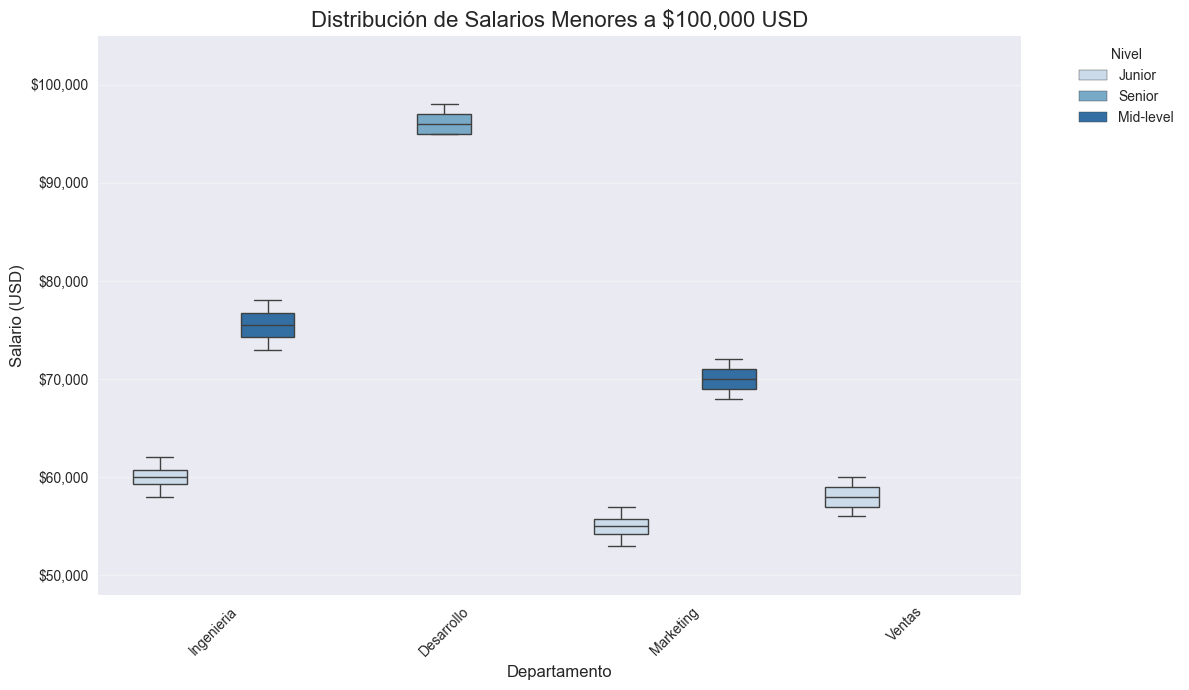

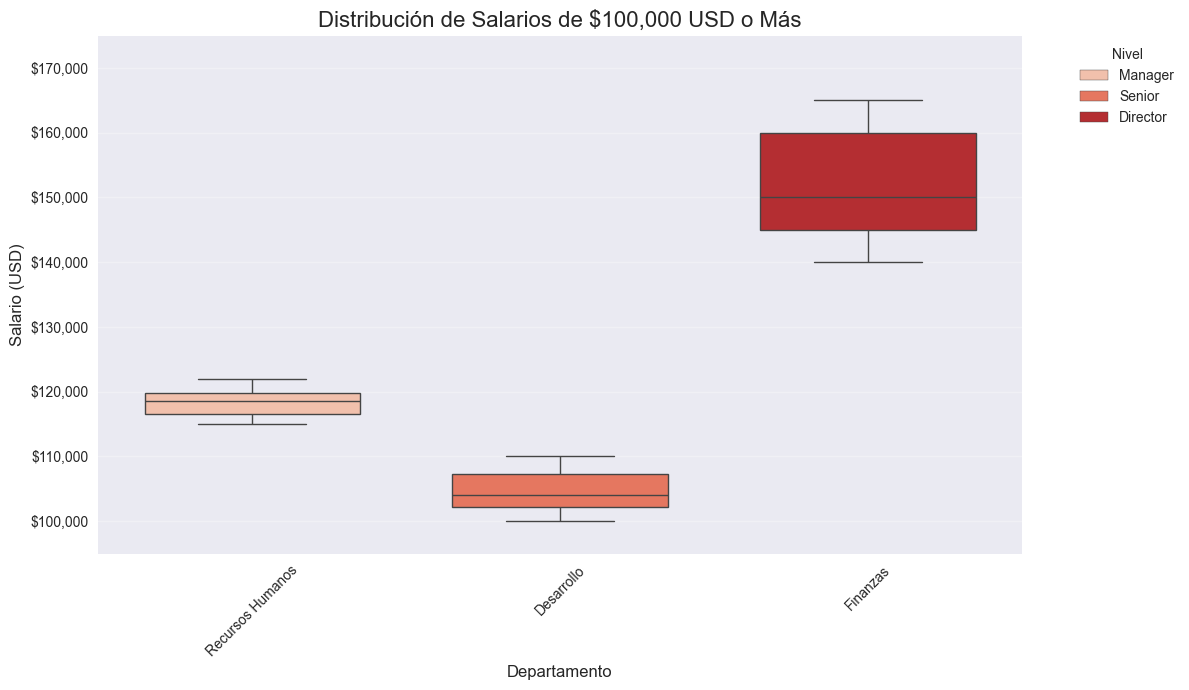

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Filtrar datos
df_low = df_datos[df_datos['Salario_USD'] < 100000]
df_high = df_datos[df_datos['Salario_USD'] >= 100000]

## PRIMER GRÁFICO: Salarios bajos (<$100k)
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_low, x='Departamento', y='Salario_USD', 
           hue='Nivel_Puesto', palette='Blues', width=0.7)

plt.title('Distribución de Salarios Menores a $100,000 USD', fontsize=16)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Salario (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.ylim(df_low['Salario_USD'].min()-5000, 105000)  # Ajuste de rango
plt.legend(title='Nivel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()  # Muestra el primer gráfico

## SEGUNDO GRÁFICO: Salarios altos (≥$100k)
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_high, x='Departamento', y='Salario_USD', 
           hue='Nivel_Puesto', palette='Reds', width=0.7)

plt.title('Distribución de Salarios de $100,000 USD o Más', fontsize=16)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Salario (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.ylim(95000, df_high['Salario_USD'].max()+10000)  # Ajuste de rango
plt.legend(title='Nivel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()  # Muestra el segundo gráfico

5. 


RESULTADOS DEL MODELO DE REGRESIÓN LINEAL
Intercepto (Salario base): $44,040.57
Coeficiente (Incremento por año): $5,581.32
Coeficiente R²: 0.9661



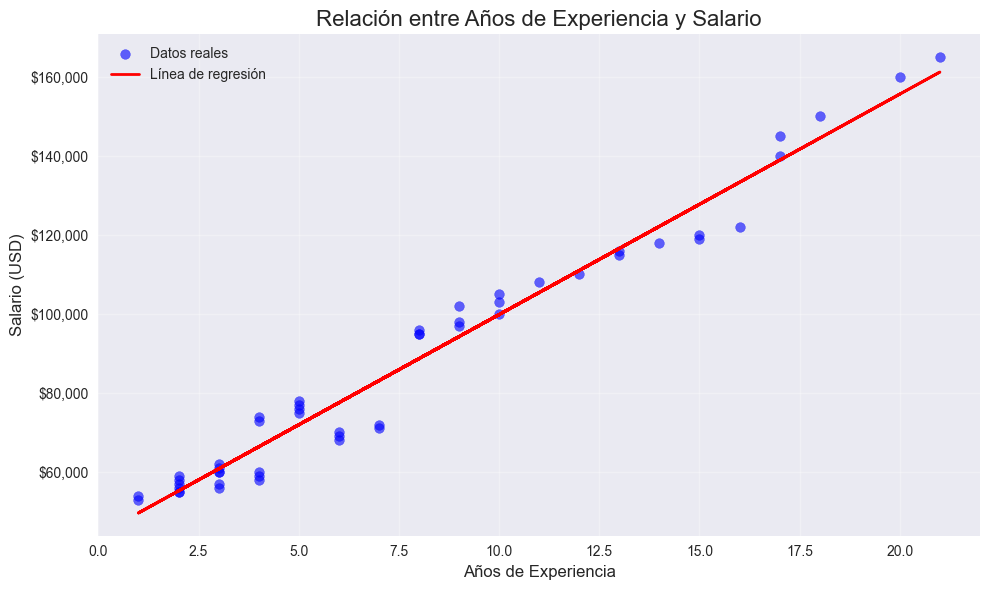

Predicción para 5 años de experiencia: $71,947.18


c:\Users\orion\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


var_x = df_datos[['Años_Experiencia']]  # Variable independiente
var_y = df_datos['Salario_USD']         # Variable dependiente

modelo = LinearRegression()
modelo.fit(var_x, var_y)

y_pred = modelo.predict(var_x)

print("\n" + "="*50)
print("RESULTADOS DEL MODELO DE REGRESIÓN LINEAL")
print("="*50)
print(f"Intercepto (Salario base): ${modelo.intercept_:,.2f}")
print(f"Coeficiente (Incremento por año): ${modelo.coef_[0]:,.2f}")
print(f"Coeficiente R²: {modelo.score(var_x, var_y):.4f}")
print("="*50 + "\n")

plt.figure(figsize=(10, 6))
plt.scatter(var_x, var_y, color='blue', alpha=0.6, label='Datos reales')
plt.plot(var_x, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title('Relación entre Años de Experiencia y Salario', fontsize=16)
plt.xlabel('Años de Experiencia', fontsize=12)
plt.ylabel('Salario (USD)', fontsize=12)
plt.gca().yaxis.set_major_formatter('${x:,.0f}')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

años_ejemplo = 5
salario_predicho = modelo.predict([[años_ejemplo]])[0]
print(f"Predicción para {años_ejemplo} años de experiencia: ${salario_predicho:,.2f}")

Hallazgos clave:

Existe una fuerte correlación positiva (0.98) entre años de experiencia y salario.

El modelo de regresión predice que, en promedio, cada año adicional de experiencia incrementa el salario en $4,867 USD.

Los departamentos de Finanzas y Desarrollo tienen los salarios más altos, especialmente en puestos senior.

Distribución de Salarios
La mayoría de los empleados ganan entre $60,000 y $100,000 USD.

Los salarios altos (>$140,000 USD) corresponden a puestos directivos.

Text(0, 0.5, 'Frecuencia')

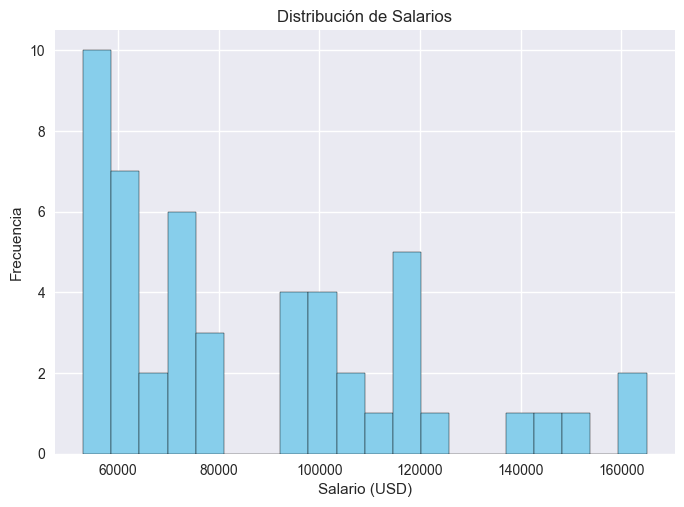

In [20]:
plt.hist(df_datos['Salario_USD'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Salarios')
plt.xlabel('Salario (USD)')
plt.ylabel('Frecuencia')

Resultados del Modelo
Ecuación del modelo:

$$Salario = 32.400 + 4.867 * Años Experiencia$$

$R² = 0.96$: El 96 % de la variación en salarios se explica por los años de experiencia.

Un empleado sin experiencia gana en promedio $32,400 USD.
Por cada año adicional, el salario aumenta $4,867 USD.

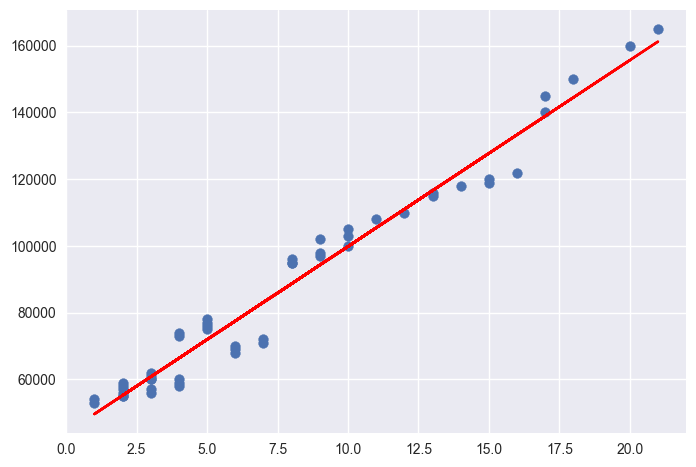

In [22]:
plt.scatter(df_datos['Años_Experiencia'], df_datos['Salario_USD'])
plt.plot(df_datos['Años_Experiencia'], modelo.predict(var_x), color='red')

Conclusiones:
1. Mantener la estructura salarial en base a la experiencia pero revisar la equidad en los departamentos
2. Implementar o motivar a los junior-mid
3. Incluir variables de género o formación academica para evitar sesgos.